Gizeh (that is, Cairo for tourists) is a great interface to the Cairo drawing library. 

I recently wished to make a small animation of a bar moving in the visual field and crossing a simple receptive field to illustrate some simple motions that could be captured in the primary visual cortex ansd experiments that could be done there.

<!-- TEASER_END -->

Let's first draw a simple receptive field as a disk filled with a radial gradient:

In [1]:
!python3 -m pip install git+https://github.com/Zulko/gizeh.git

  Cloning https://github.com/Zulko/gizeh.git to /private/var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/pip-req-build-d26_plfz
  Stored in directory: /private/var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/pip-ephem-wheel-cache-_1r9oh3r/wheels/8c/cb/46/7c7b614e37b5d68c26a0fa67f07801576c470884e7983c3b37
Successfully built gizeh



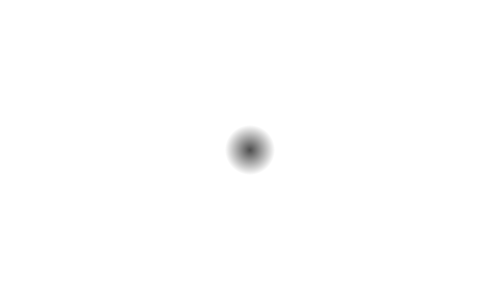

In [1]:
import gizeh as gz
W, H = 500, 300
r, gray, t = 25., .3, 1.

surface = gz.Surface(W,H, bg_color=(1, 1, 1)) # white background
gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                            xy1=[0, 0], xy2=[0, 0], xy3=[0, r])
rf = gz.circle(r=r, xy=(W/2., H/2.), fill=gradient)
#rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/2)

rf.draw(surface)
surface.ipython_display()

## filling with a RadialGradient

Looks easy, however, this took a little searching and tweaking. Finally found some documentation  @ http://docs.go-mono.com/index.aspx?link=T%3aCairo.RadialGradient about the ``RadialGradient`` class: 

    Extends Cairo.Gradient to create a new radial gradient between the two circles defined by (cx0, cxy0, radius0) and (cx1, cy1, radius1).

such that we should have the following equivalence between Gizeh and Cairo

    xy1, xy2, xy3 = (cx0, cy0), (cx1, cy1), (radius0, radius1)

a couple of MWE (AKA Mimimum Working Example) for each different parameter should be more helpful to see what happens:


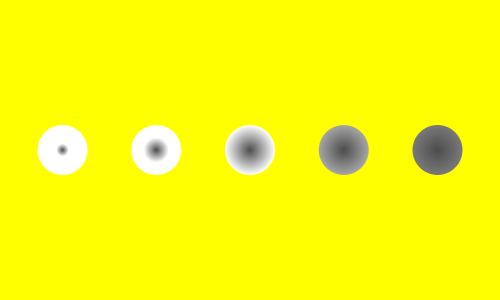

In [3]:
import gizeh as gz
import numpy as np

W, H = 500, 300
r, gray = 25., .3

surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background

N = 5
for x, radius1 in zip(np.linspace(W/8., 7*W/8., N), np.logspace(-2, 2, N, base=2)*r):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[0, 0], xy2=[0, 0], xy3=[0, radius1])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()


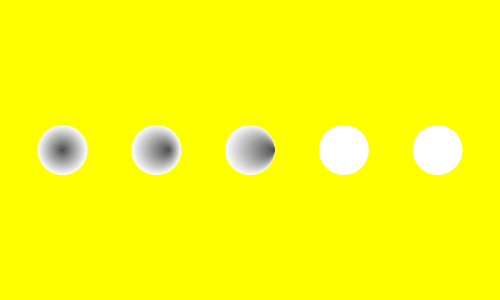

In [4]:
surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background
for x, cx0 in zip(np.linspace(W/8., 7*W/8., N), np.linspace(0, 2*r, N)):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[cx0, 0], xy2=[0, 0], xy3=[0, r])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()


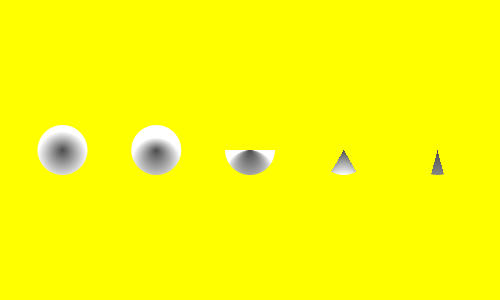

In [5]:
surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background
for x, radius0 in zip(np.linspace(W/8., 7*W/8., N), np.logspace(-2, 2, N, base=2)*r):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[0, 0], xy2=[0, 0], xy3=[radius0, r])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()


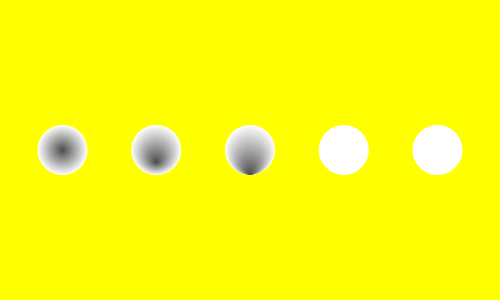

In [6]:
surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background
for x, cy0 in zip(np.linspace(W/8., 7*W/8., N), np.linspace(0, 2*r, N)):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[0, cy0], xy2=[0, 0], xy3=[0, r])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()


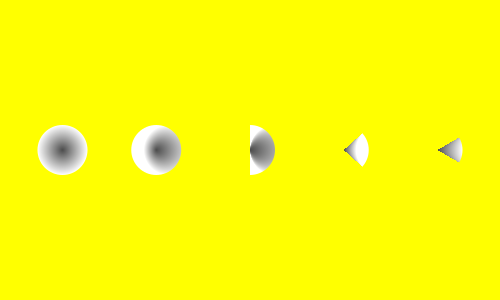

In [7]:
surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background
for x, cy1 in zip(np.linspace(W/8., 7*W/8., N), np.linspace(0, 2*r, N)):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[0, 0], xy2=[0, cy1], xy3=[0, r])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()

## Making an animation

And now the animation for the straight trajectory of a segment with perpendicular orientation:

In [8]:
import numpy as np
import gizeh as gz
import moviepy.editor as mpy

W, H = 500, 300
duration = 3
r, color = 25., .1
figpath = '/tmp/'
fps = 25

gradient = gz.ColorGradient(type="radial", stops_colors = [(0,(color,color,color)), (1,(1,1,1))],
                            xy1=[0,0], xy2=[0,0], xy3 = [0, r])
rf = gz.circle(r=r, xy=(W/2., H/2.), fill=gradient)

def make_frame(t):

    surface = gz.Surface(W,H, bg_color=(1,1,1))
    rf.draw(surface)

    rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/2)
    rect.draw(surface)

    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_videofile(figpath + 'trax_0.mp4', fps=fps) # Many options...

clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


t:  37%|███▋      | 28/75 [00:00<00:00, 270.51it/s, now=None]

Moviepy - Building video /tmp/trax_0.mp4.
Moviepy - Writing video /tmp/trax_0.mp4



t:  35%|███▍      | 26/75 [00:00<00:00, 255.60it/s, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/trax_0.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


A straight trajectory of a segment with a slanted orientation:

In [9]:
def make_frame(t):
    surface = gz.Surface(W,H, bg_color=(1,1,1))
    rf.draw(surface)
    rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/3)
    rect.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_videofile(figpath + 'trax_1.mp4', fps=fps) # Many options...

clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)

t:  36%|███▌      | 27/75 [00:00<00:00, 262.97it/s, now=None]

Moviepy - Building video /tmp/trax_1.mp4.
Moviepy - Writing video /tmp/trax_1.mp4



t:  35%|███▍      | 26/75 [00:00<00:00, 256.45it/s, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/trax_1.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


A straight trajectory of a segment with an ondulating orientation:

In [10]:
def make_frame(t):
    surface = gz.Surface(W,H, bg_color=(1,1,1))
    rf.draw(surface)
    modul = 1 - .2*np.sin(2*np.pi*t/duration)
    rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/2*modul)
    rect.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_videofile(figpath + 'trax_2.mp4', fps=fps) # Many options...
clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)

t:  36%|███▌      | 27/75 [00:00<00:00, 263.41it/s, now=None]

Moviepy - Building video /tmp/trax_2.mp4.
Moviepy - Writing video /tmp/trax_2.mp4



t:  33%|███▎      | 25/75 [00:00<00:00, 249.89it/s, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/trax_2.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


An ondulating trajectory of a segment with an ondulating orientation, *and* with the orientation always perpentdicular to the orientation:

In [11]:
def make_frame(t):
    surface = gz.Surface(W,H, bg_color=(1,1,1))
    rf.draw(surface)
    modul = 1 - .2*np.sin(2*np.pi*t/duration)
    ymodul = 1 + .2*(np.cos(2*np.pi*t/duration)+1)
    rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.*ymodul), fill=(0,1,0), angle=np.pi/2*modul)
    rect.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_videofile(figpath + 'trax_3.mp4', fps=fps) # Many options...
clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)

t:  36%|███▌      | 27/75 [00:00<00:00, 265.60it/s, now=None]

Moviepy - Building video /tmp/trax_3.mp4.
Moviepy - Writing video /tmp/trax_3.mp4



t:  33%|███▎      | 25/75 [00:00<00:00, 248.44it/s, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/trax_3.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Voilà!